# Serialize models

In [103]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [104]:
net = torch.load('gen.pkl').eval()

/home/rkhaydurov/anaconda3/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'models.generator.Generator' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/rkhaydurov/anaconda3/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/rkhaydurov/anaconda3/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by acc

In [105]:
input = torch.from_numpy(np.load("target_test.npy")[:200]).float()

In [106]:
noise = torch.randn(200, 100)

In [108]:
net(noise, input).shape

torch.Size([200, 1, 32, 32])

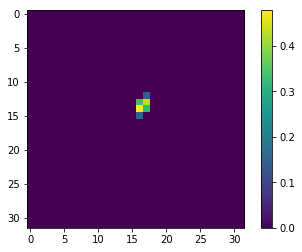

In [109]:
plt.imshow(net(noise, input)[9, 0].cpu().detach())
plt.colorbar()
plt.show()

In [78]:
traced_module = torch.jit.trace(net, (noise, input))
traced_module.save("cpp_model.pt")